# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, ttest_ind
from numpy.random import seed
#import scipy.stats as stat
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [5]:
medical.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ Median may be a better parameter to look at than mean. The population is skewed to the right and it is easy to see this is not a normal distribution. There are clearly more patients who are charged much less than the mean than there are patients charged more than the mean. The standard deviation is so large that it captures all of the data to the left of the mean.

In [6]:
np.std(medical.charges, ddof=1)

12110.011236693994

In [7]:
medical.charges.std()

12110.011236693994

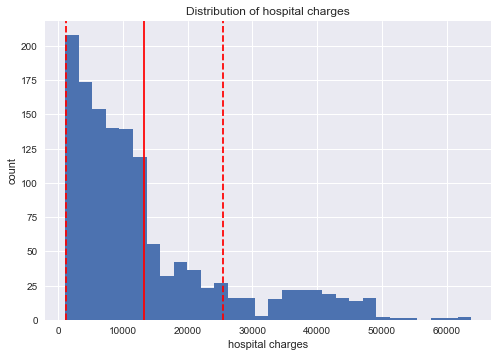

In [8]:
plt.style.use('seaborn')

charge_mean = medical.charges.mean()
charge_std = medical.charges.std()

_ = plt.hist(medical.charges, bins=30)
_ = plt.xlabel('hospital charges')
_ = plt.ylabel('count')
_ = plt.title('Distribution of hospital charges')
_ = plt.axvline(charge_mean, color='r')
_ = plt.axvline(charge_mean + charge_std, color='r', linestyle='--')
_ = plt.axvline(charge_mean - charge_std, color='r', linestyle='--')

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ On the assumption that these data represent a random sample of charges, the sample is representative of the actual population, so applying our results to the entire population is justified. Of the frequentist test discussed so far, a t-statistic (one-sided in this case).

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ A one-sided confidence interval is appropriate here since the null hypothesis is *the average patient charge at the hospital is below* 12000 whereas the alternative hypothesis is the average patient charge is $\ge$ $12000.

In [9]:
from scipy.stats import t

In [10]:
t_crit = t.ppf(0.95, df=len(medical.charges)-1)
print(t_crit)

1.6459941145571317


In [11]:
std_eom = np.std(medical.charges)/np.sqrt(len(medical.charges))
print(std_eom)

330.943713906084


In [12]:
moe = t_crit*std_eom
print(moe)

544.7314053390934


In [13]:
CI_95 = (charge_mean-moe, charge_mean+moe)
print(CI_95)

(12725.690859802164, 13815.15367048035)


In [14]:
# sanity check:
t.interval(alpha=0.90, df=len(medical.charges)-1, loc=charge_mean, scale=std_eom)

(12725.690859802164, 13815.15367048035)

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ 

$H_0$: The average charge for patients with insurance is the same as the average charge for patients without insurance.

$H_a$: The average charge for patients with insurance differs from the average charge for patients without insurance. 

We are assuming homoscedasticity (equal variances between groups).

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [15]:
insured = medical[medical.insuranceclaim == 1]
uninsured = medical[medical.insuranceclaim == 0]

In [16]:
x_i = np.mean(insured.charges)
x_u = np.mean(uninsured.charges)

In [17]:
n_i = len(insured)
n_u = len(uninsured)
df_p = n_i + n_u -2
# calc the standard deviations (pandas .std() seems to give the same thing, but I'll be explicit with np)
s_i = np.std(insured.charges, ddof=1)
s_u = np.std(uninsured.charges, ddof=1)

In [19]:
s_p = np.sqrt(((n_i-1)*s_i**2 + (n_u-1)*s_u**2)/df_p)
t_p = (x_i-x_u)/(s_p*np.sqrt(1/n_i + 1/n_u))
print(s_p, t_p)

11520.034268775256 11.89329903087671


In [20]:
# p value 
1 - t.cdf(t_p, df_p)

0.0

In [21]:
ttest_ind(insured.charges, uninsured.charges)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ There is no equivalent test for z-test from a sample. An assumption of the z-test is that the sample is large and if the sample size is large enough for the assumption to be satisfied, the t test produces the same result.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test